<a href="https://colab.research.google.com/github/hungryjins/DA_portfolio/blob/main/Chapter06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Chapter 06 **
** ┗ Deposit product telemarketing subscription prediction **
---
> ** Contents (context) **

* Looking at the problem situation and data
* Definition of problem solving process
* 🥉Session 1 -Comparison of subscription rate according to customer profile conditions 」
* 🥈SESSION 2 -「Rule base -based product subscription prediction」
* 🥇SESSION 3 -「ML Use Product Subscription prediction」


In [ ]:
# ▶ Remove Warnings
import warnings
warnings.filterwarnings('ignore')

# ▶ Google Drive Mount or folder click Google Drive Connection
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/DA portfolio/DA_colab/06_Telemarketing Subscription Prediction for Deposit Products')
os.getcwd()

'/content/drive/MyDrive/DA portfolio/DA_colab/06_Telemarketing Subscription Prediction for Deposit Products'

## ** Looking at the problem situation and data **
---
> ** Scenario ** 🏦 🏦 (Teles Marketer, Service Planner, Product Manager)

``
In recent years, stocks and coin investments have been blewing, resulting in a decrease in the number of subscribers of Bank A.When the regular deposit subscription rate is high, promotion is made in the form of MASS marketing.
Even though it was more efficient compared to investment, the subscription rate is falling, so the efficiency is decreasing compared to marketing costs.Marketing cost
In order to reduce, we want to extract customer groups with high possibility of subscription to regular deposits and perform target marketing.
``


> ** Looking at the data **

* Each customer has a history of past campaigns (marketing) and data from the current campaign.
* Duration is excluded when predicting (※ ※ because it is determined by Y (whether to join) depending on the call time)
* Data specification ⬇

| Job | Marital | Education | Default | Housing | Loan | Contact | MONTH | DAY_OF_WEEK | Duration | Campaign | PDAYS |
| ----: | ---: |--| ---: | ---: | ----: | ---: | ---: ---: ----: ----: | ---: ---:-| ----:-|-| --- |


| Previus | Poutcome | Emp.var.rate | cons.price.idx | conss.conf.idx | EURIBOR3M | nr, employed | Y |


In [ ]:
# ▶ Data read
import pandas as pd
df = pd.read_csv('chapter06_bank.csv', sep=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## ** Problem solving process definition **
---
> ** ** of the problem

``
▶ Reduced regular deposit subscribers, low efficiency compared to marketing cost investment
``

> ** Expected effect **

``
▶ Increasing regular deposit subscription rate, increase in marketing cost investment land efficiency
``

> ** Solution **

``
▶ Target customer group extraction and target marketing with high possibility of registering for regular deposits
▶ Session 1 🥉
-Preating and Categorical (category) variable search
▶ Session 2 🥈
-Data exploration & Rule base -based subscription rates with high customer group extraction
▶ Session 3 🥇
-Customer prediction with high possibility of joining ML algorithms
``

> ** Performance measurement **

``
▶ Target customer group regular deposit subscription rate compared to the control group
``

> ** Public application **

``
▶ Target customer group extraction using MODEL after creating month Data Mart
▶ Marketing effect monitoring through comparison with control group after marketing
``

> ** Main code preview **

``
▶ Session 1 → List.append (), SNS.CATPLOT ()
▶ Session 2 → Value_counts (), PD.PIVOT_TABLE (), SNS.CATPLOT (), sort_values ​​()
▶ Session 3 → RandomForestClassifier, Labelencoder (), Classification_report
``


## ** 🥉Session 1 **
** ┗ Comparison of subscription rate according to customer profile conditions **
---


### · Data pretreatment
---
* Check the basic information of the collected data

(1) Data Shape Check

(2) Check Data Type

(3) NULL value check (※ Data of empty values)

(4) Outlier verification (※ Data beyond normal category)


In [ ]:
# ▶ Data type confirmation
# ▶ 41,188 ROW, 21 COL
print('df', df.shape)

df (41188, 21)


In [ ]:
# ▶ Data Type Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# ▶ Check NULL value
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
# ▶ Outlier confirmation, negative value check
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df['y'].value_counts()

,count
y,
no,36548
yes,4640


In [ ]:
# ▶ Average regular deposit subscription rate 11%
4640 / (36548+4640)

0.11265417111780131

### · Categorical (category) variable
---
* Know the current status of categorical variables.


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df['age'].dtypes

dtype('int64')

In [ ]:
# ▶ Numeric, Categorical Value Sharing
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

In [ ]:
print(numeric_list)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


In [ ]:
print(categoical_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


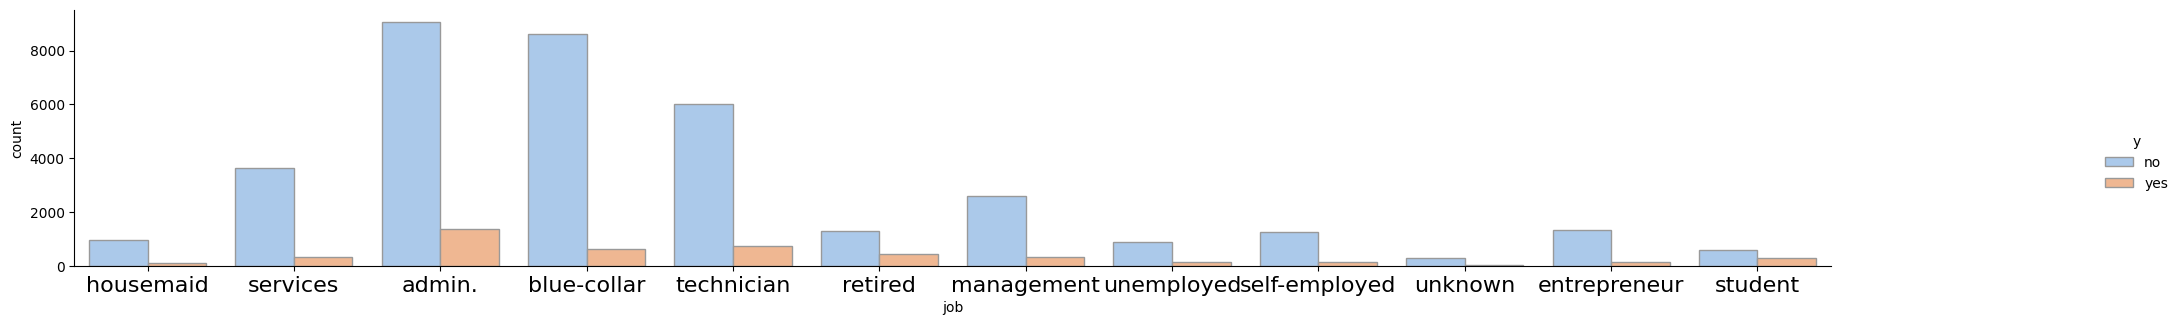

In [ ]:
# example
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3);
plt.xticks(fontsize=16);

([0, 1, 2],
 [Text(0, 0, 'nonexistent'), Text(1, 0, 'failure'), Text(2, 0, 'success')])

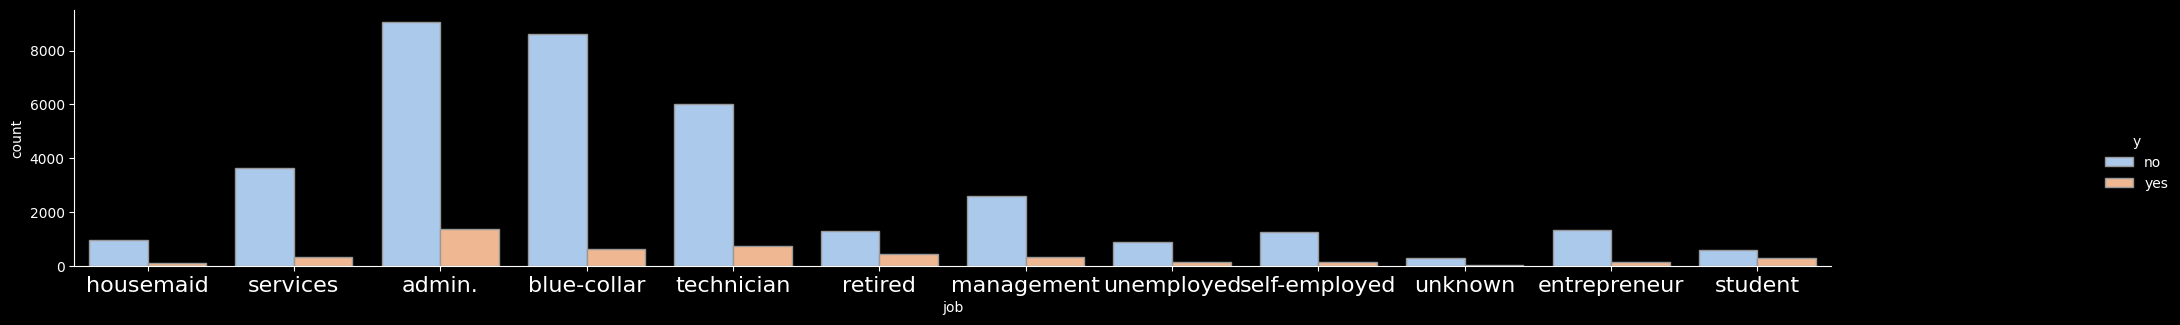

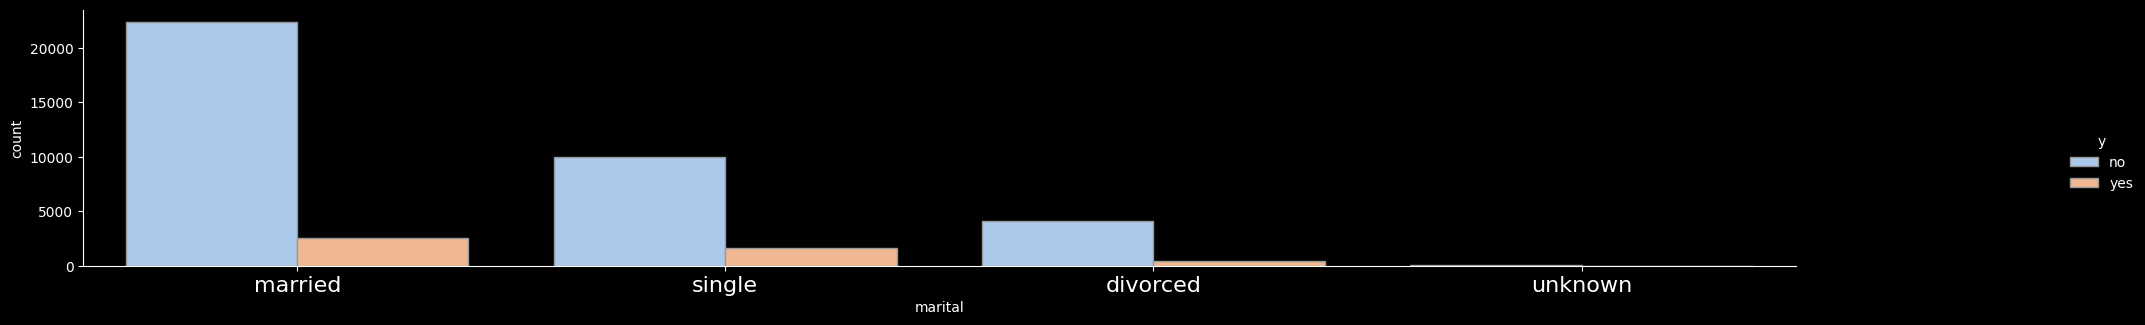

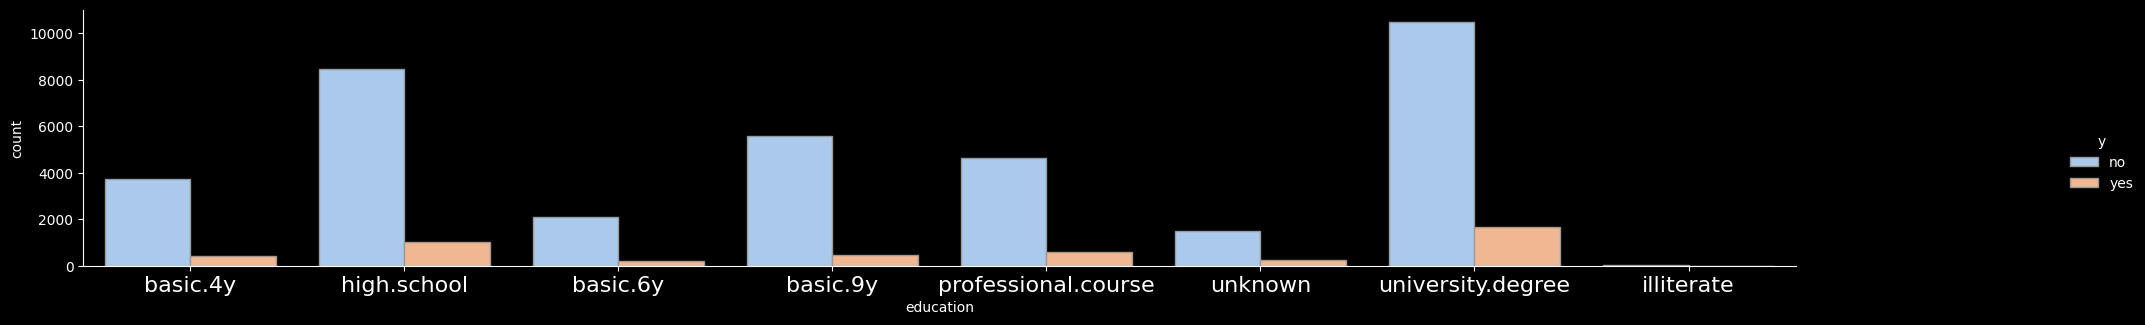

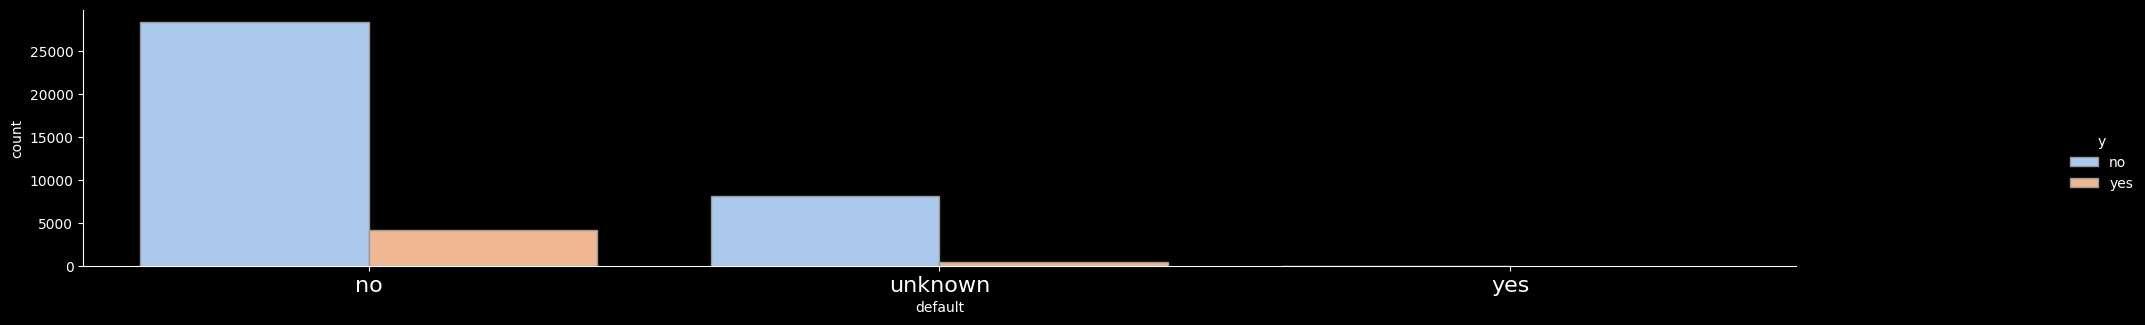

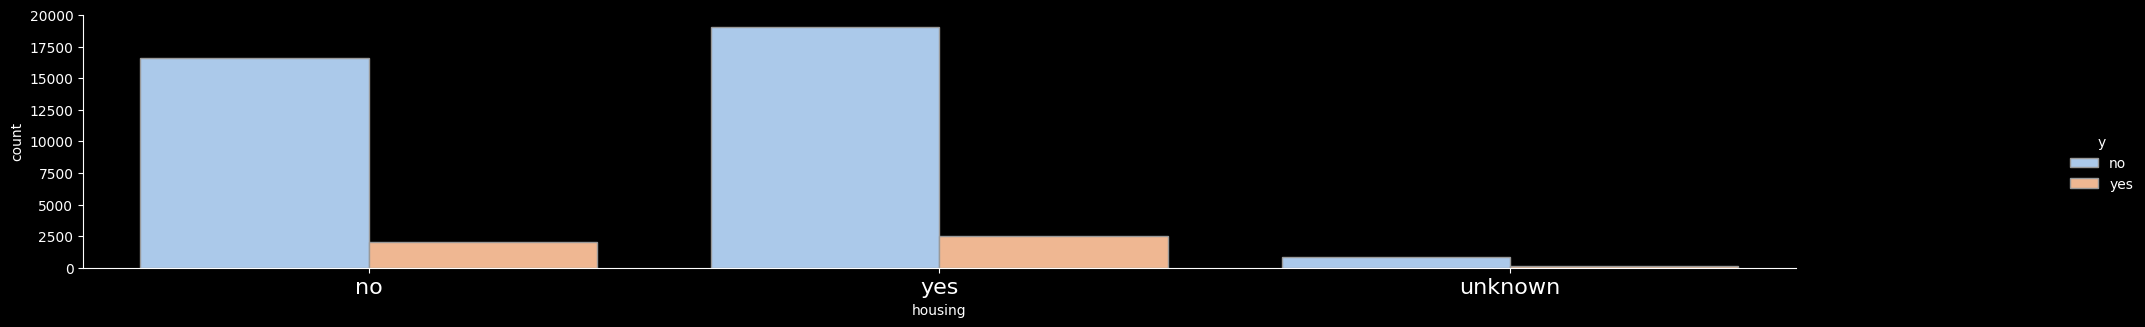

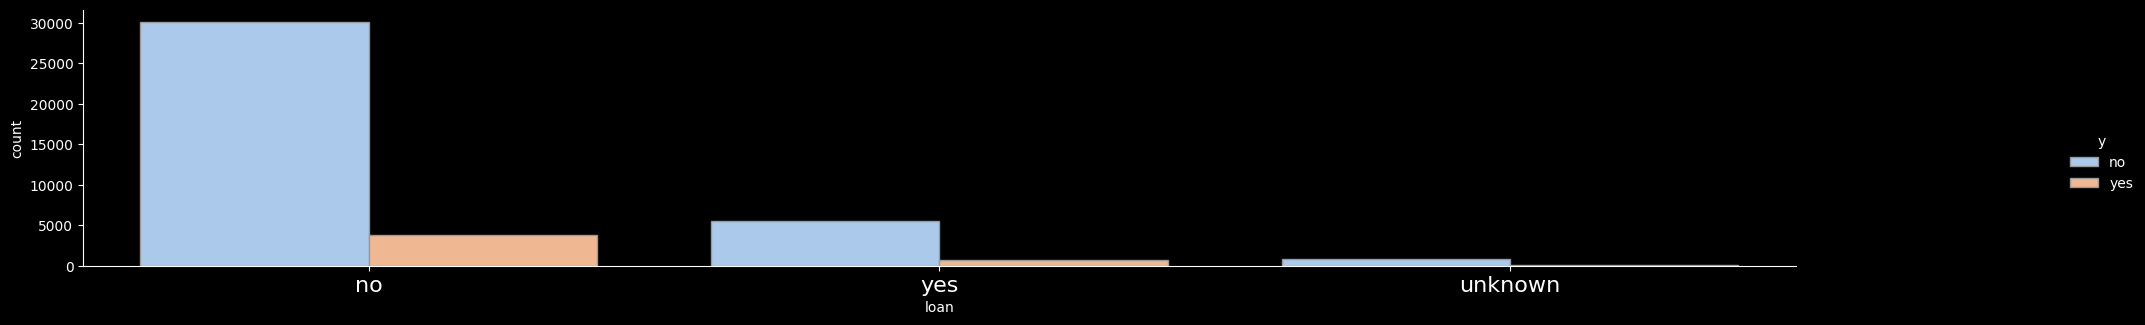

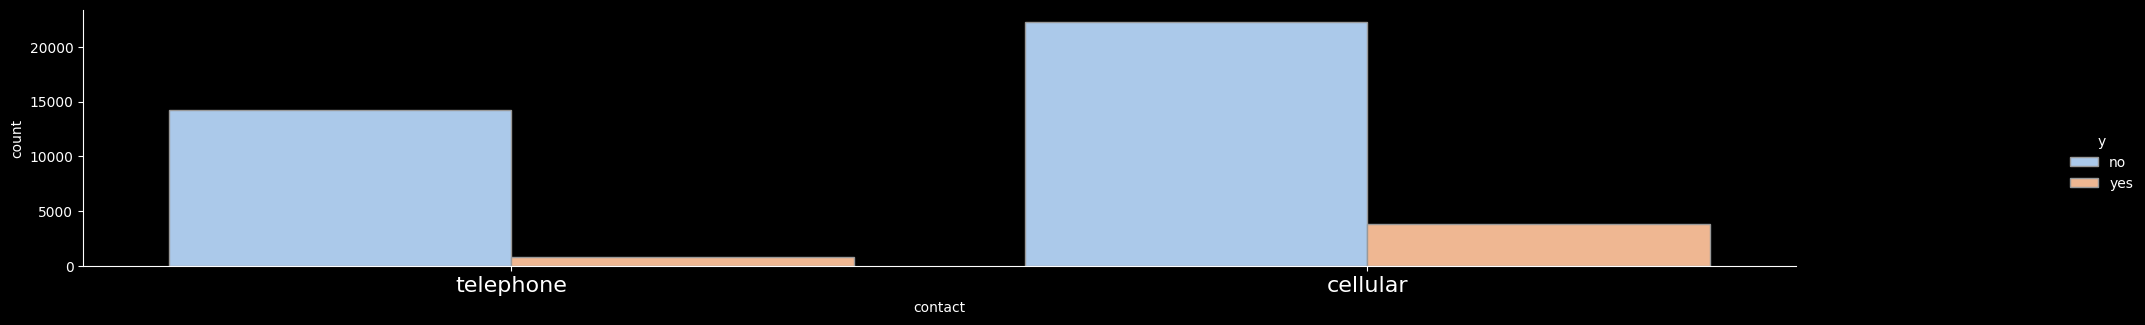

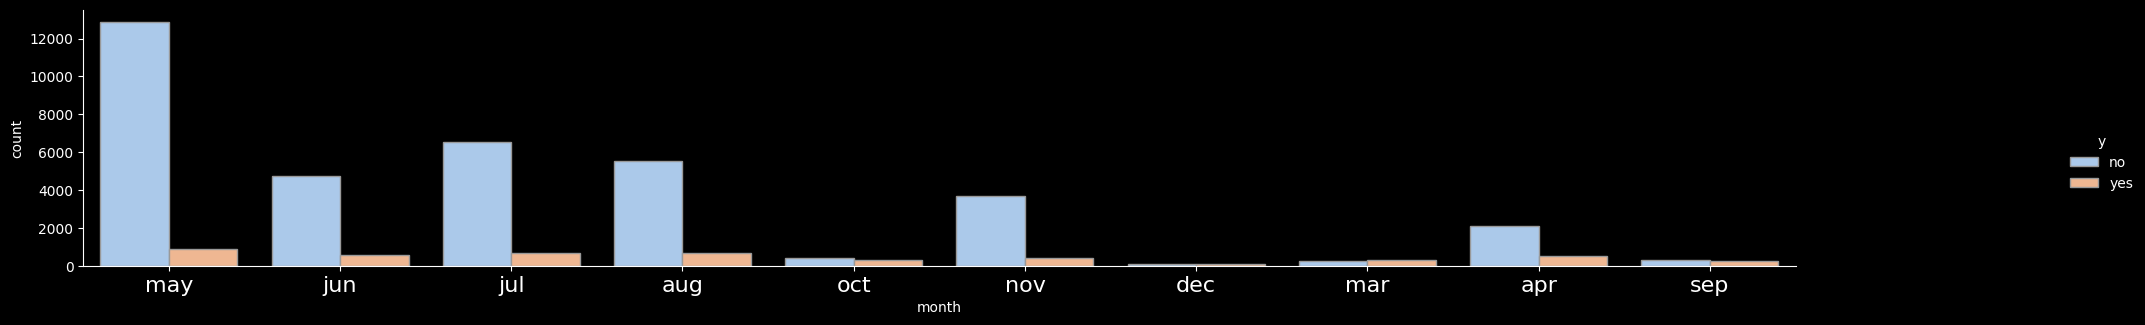

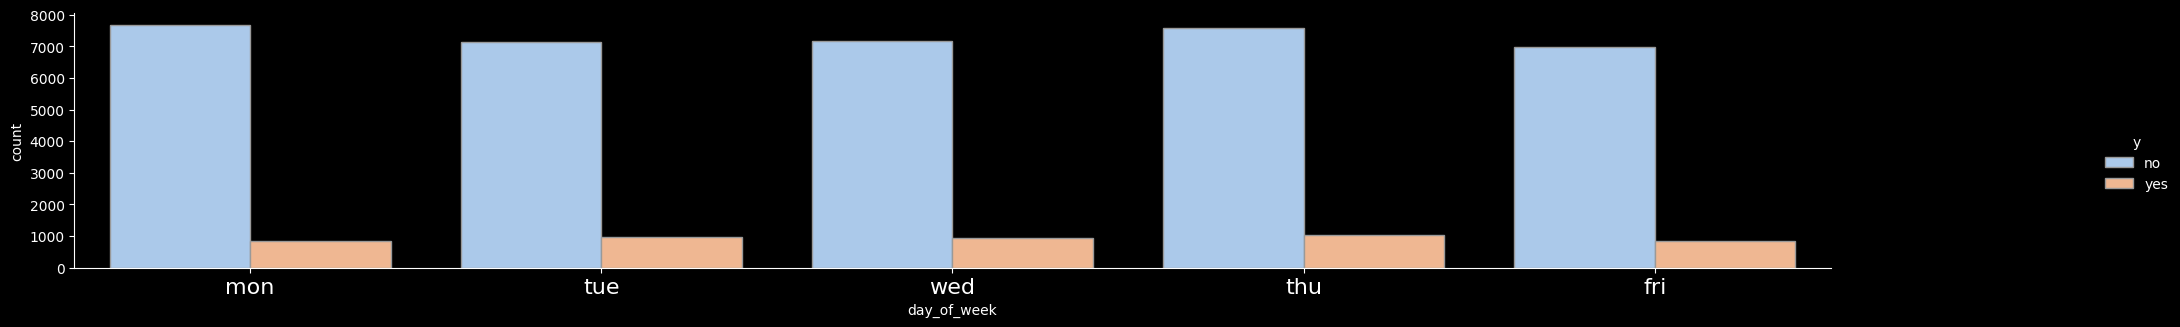

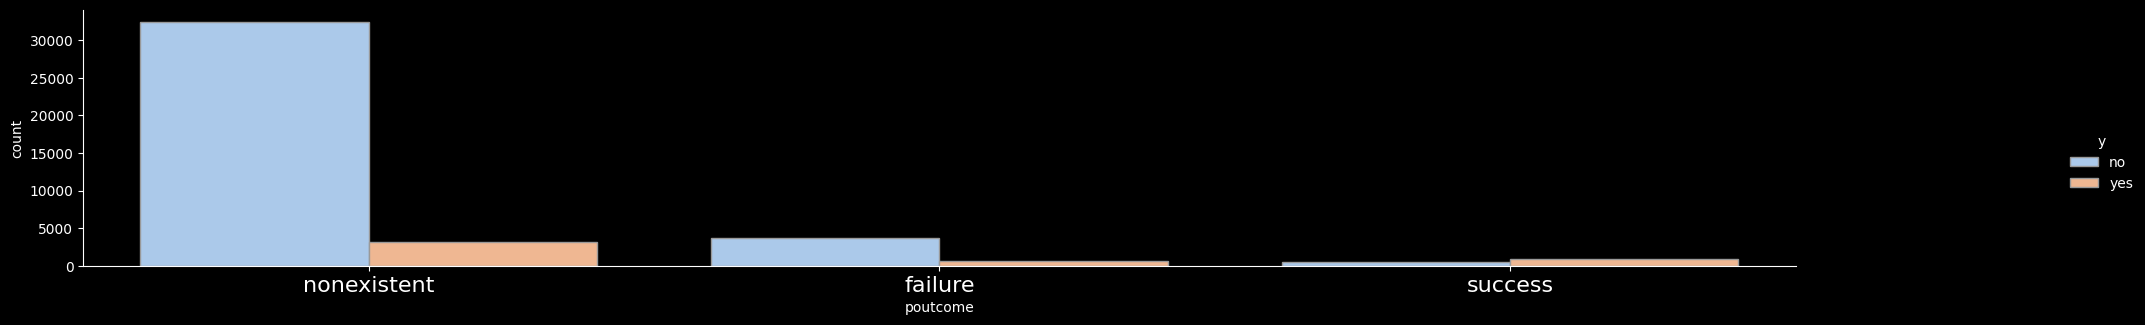

In [ ]:
# ▶ Using CATPLOT, looking at the configuration of the Categorical variable and the situation of regular deposits at a glance
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="marital", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="education", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="default", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="housing", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="loan", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="contact", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="month", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="day_of_week", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)

sns.catplot(x="poutcome", hue="y", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)
plt.xticks(fontsize=16)


## ** 🥈Session 2 **
** ┗ Rule base -based product subscription prediction **
---
* The basis for know -how that can be obtained from empirical knowledge in the field
* "The know -how of these people will be high" and application after verification with data


### · Customer Profile -Comparison of subscription rate
---


In [ ]:
# ▶ Comparison of regular deposit subscription rate according to customer job
df_job=pd.DataFrame(df['y'].groupby(df['job']).value_counts())
df_job.columns=['cnt']
df_job=df_job.reset_index()
df_job.head(5)

,job,y,cnt
0,admin.,no,9070
1,admin.,yes,1352
2,blue-collar,no,8616
3,blue-collar,yes,638
4,entrepreneur,no,1332


In [ ]:
# ▶ Convert to one ROW using Pivot Table
df_job = pd.pivot_table(df_job,        # Pivot data frame
                     index = 'job',    # Passes in the line
                     columns = 'y',    # Heat to enter the column position
                     values = 'cnt')   # Open to be used as data

df_job = df_job.reset_index()
df_job.head(5)

y,job,no,yes
0,admin.,9070.0,1352.0
1,blue-collar,8616.0,638.0
2,entrepreneur,1332.0,124.0
3,housemaid,954.0,106.0
4,management,2596.0,328.0


In [ ]:
# ▶ Sign_ratio
df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)
df_job

y,job,no,yes,sign_ratio
0,admin.,9070.0,1352.0,13.0
1,blue-collar,8616.0,638.0,6.9
2,entrepreneur,1332.0,124.0,8.5
3,housemaid,954.0,106.0,10.0
4,management,2596.0,328.0,11.2
5,retired,1286.0,434.0,25.2
6,self-employed,1272.0,149.0,10.5
7,services,3646.0,323.0,8.1
8,student,600.0,275.0,31.4
9,technician,6013.0,730.0,10.8


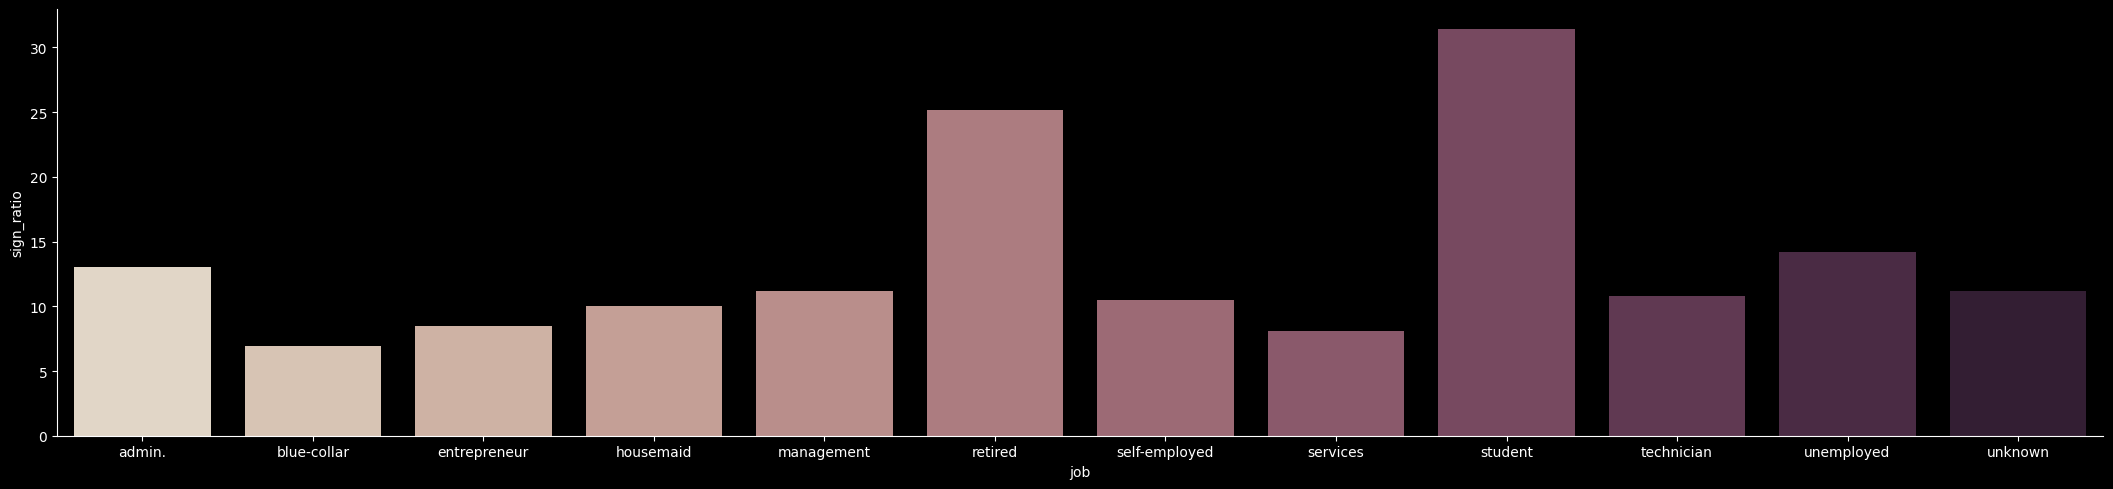

In [ ]:
# ▶ Student (student) has the highest subscription rate, followed by retired customers (※ Average subscription rate 11%)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.catplot(x="job", y="sign_ratio", kind='bar', palette="ch:.25", data=df_job);
plt.rc('xtick', labelsize=20)
plt.gcf().set_size_inches(25, 5)

In [ ]:
i = 'poutcome'

# Step 1
df_gp=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
df_gp.columns=['cnt']
df_gp=df_gp.reset_index()

# Step 2
df_gp = pd.pivot_table(df_gp,              # Pivot data frame
                        index = i,         # Passes in the line
                        columns = 'y',     # Heat to enter the column position
                        values = 'cnt')    # Open to be used as data

# Step 3
df_gp = df_gp.reset_index()

# Step 4
df_gp['sign_ratio'] =   round((df_gp['yes'] / (df_gp['yes'] + df_gp['no'])) * 100,1)

df_gp=df_gp.sort_values(by=['sign_ratio'], ascending=False)
df_gp

y,poutcome,no,yes,sign_ratio
2,success,479.0,894.0,65.1
0,failure,3647.0,605.0,14.2
1,nonexistent,32422.0,3141.0,8.8


In [ ]:
# ▶ All subscription rate comparisons for categorical variables
categoical_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
# ▶ 'Y' is a prediction value, so deleted from the list
categoical_list.remove('y')

In [ ]:
# ▶ All subscription rate comparisons for categorical variables
# ▶ Output only for ROW with the highest subscription rate by feature

for i in categoical_list :
  # Step 1
  df_job=pd.DataFrame(df['y'].groupby(df[i]).value_counts())
  df_job.columns=['cnt']
  df_job=df_job.reset_index()

  # Step 2
  df_job = pd.pivot_table(df_job,        # Pivot data frame
                      index = i,         # Passes in the line
                      columns = 'y',     # Heat to enter the column position
                      values = 'cnt')    # Open to be used as data

  # Step 3
  df_job = df_job.reset_index()

  # Step 4
  df_job['sign_ratio'] =   round((df_job['yes'] / (df_job['yes'] + df_job['no'])) * 100,1)

  df_job=df_job.sort_values(by=['sign_ratio'], ascending=False)

  print(df_job.iloc[0:1,:])
  print('')

y      job     no    yes  sign_ratio
8  student  600.0  275.0        31.4

y  marital    no   yes  sign_ratio
3  unknown  68.0  12.0        15.0

y   education    no  yes  sign_ratio
4  illiterate  14.0  4.0        22.2

y default       no     yes  sign_ratio
0      no  28391.0  4197.0        12.9

y housing       no     yes  sign_ratio
2     yes  19069.0  2507.0        11.6

y loan       no     yes  sign_ratio
0   no  30100.0  3850.0        11.3

y   contact       no     yes  sign_ratio
0  cellular  22291.0  3853.0        14.7

y month     no    yes  sign_ratio
5   mar  270.0  276.0        50.5

y day_of_week      no     yes  sign_ratio
2         thu  7578.0  1045.0        12.1

y poutcome     no    yes  sign_ratio
2  success  479.0  894.0        65.1



### · Rule base subscription rate
---


In [ ]:
# ▶ Define a new Rule (rules) as a condition that was higher than the average subscription rate (11%) on the top.

df_rule = df[ (df['job'] == 'student') |
#(df['marital'] == 'unknown') |
#(df['education'] == 'illiterate') |
#(df['default'] == 'no') |
#(df['housing'] == 'yes') |
#(df['loan'] == 'no') |
(df['contact'] == 'cellular') |
(df['month'] == 'mar') |
(df['day_of_week'] == 'thu') |
(df['poutcome'] == 'success') ]

In [ ]:
df_rule['y'].value_counts()

,count
y,
no,25143
yes,4091


In [ ]:
# ▶ When extracting the target customer group by Rule, the average 14% subscription rate is
4091 / (4091 + 25143)

0.1399397961277964

## ** 🥇Session 3 **
** ┗ ML Use Product Subscription Forecast **
---


### · Preparation of data for modeling
---
* Sharing data to FEATURE and Y, which is the value you want to predict to perform modeling
* Train / test set division for learning and prediction


In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
# ▶ Train/Test Data cannot input data in the form of characters (STR).
# ▶ Change the target data to 1 and 0 that can be understood in Model
import numpy as np
df['y']=np.where(df['y']=='yes', 1, 0)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [ ]:
# ▶ Feature (x) and Y data to learn modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X=df.drop(['duration','y'], axis=1)
Y=df['y']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(28831, 19)
(28831,)
(12357, 19)
(12357,)


In [ ]:
print(categoical_list)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [ ]:
# ▶ Categorical (category) variables must be changed to numeric variables via one-hot-encoding or label-encoding
# ▶ One-Hot-Encoding is disadvantageous for a variable with a lot of dimensions, and label-encoding is difficult to use in regression algorithms.
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    le = LabelEncoder()
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

In [ ]:
x_train[categoical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
8271,0,1,6,0,0,0,1,4,3,1
681,3,1,5,1,2,0,1,6,3,1
34465,1,1,2,0,2,0,0,6,2,1
3938,2,1,0,1,0,0,1,6,1,1
37875,8,1,6,0,2,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...
21502,0,1,6,1,0,0,0,1,3,1
20844,9,2,5,0,0,0,0,1,2,1
20718,9,1,5,0,2,0,0,1,4,1
10280,0,1,2,1,0,0,1,4,1,1


In [ ]:
x_test[categoical_list]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
22865,4,1,6,0,2,2,0,1,1,1
41034,7,2,3,0,2,0,0,8,1,2
27010,0,0,6,1,2,0,0,7,0,1
21800,7,1,3,1,0,0,0,1,4,1
18811,7,1,3,0,2,0,0,3,2,1
...,...,...,...,...,...,...,...,...,...,...
36236,10,2,6,0,2,0,0,4,1,2
11257,0,1,2,0,0,0,1,4,2,1
2188,1,1,2,0,1,1,1,6,1,1
21679,0,2,6,0,2,2,0,1,3,1


### · Model learning and evaluation
---
* Evaluate performance by learning the model and performing predictions


In [ ]:
# ▶ Learning
from sklearn.metrics import classification_report
rfc = RandomForestClassifier(random_state=123456)
rfc.fit(x_train, y_train)

# ▶ Prediction
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25583
           1       0.99      0.97      0.98      3248

    accuracy                           1.00     28831
   macro avg       0.99      0.98      0.99     28831
weighted avg       1.00      1.00      1.00     28831

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     10965
           1       0.55      0.30      0.39      1392

    accuracy                           0.89     12357
   macro avg       0.73      0.63      0.67     12357
weighted avg       0.88      0.89      0.88     12357



In [ ]:
pd.Series(y_pred_test).value_counts()

,count
0,11601
1,756


### · Hyper parameter tuning
---
* Adjusting options to increase model performance


In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [400],
           'max_depth' : [6, 8, 10]
            }

# ▶ RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 12345, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1, scoring='precision')
grid_cv.fit(x_train, y_train)

print('best parameter: ', grid_cv.best_params_)
print('best score: {:.4f}'.format(grid_cv.best_score_))

best parameter:  {'max_depth': 6, 'n_estimators': 400}
best score: 0.7099


In [ ]:
# ▶ Best Score standard study
rfc = RandomForestClassifier(n_estimators=400, max_depth=6, random_state = 123456)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25583
           1       0.75      0.20      0.31      3248

    accuracy                           0.90     28831
   macro avg       0.83      0.60      0.63     28831
weighted avg       0.89      0.90      0.88     28831

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10965
           1       0.69      0.20      0.31      1392

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.63     12357
weighted avg       0.88      0.90      0.87     12357



In [ ]:
pd.Series(y_pred_train).value_counts()

,count
0,27965
1,866


### · Identify important variables
---
* Finding important variables through feature IMP analysis


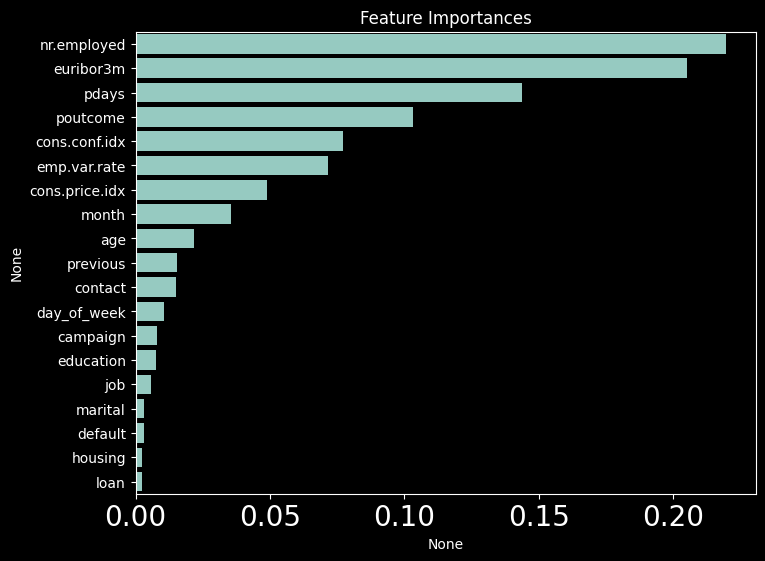

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfc.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### · Model Save and Read
---
* Save and load the final model


In [ ]:
import pickle
# Model storage
saved_model = pickle.dumps(rfc)

# Model READ
clf_from_pickle = pickle.loads(saved_model)